# Week 8-3 DTM을 활용한 텍스트 분류 - 한글

In [1]:
# 데이터 읽기

import os
import pandas as pd

os.chdir(r'C:\Users\USER\kjw\LG전자_25\Week8')
review_df=pd.read_csv("thinq_review_result.csv")

review_df

date  star  like  \
0      2021년 09월 05일     1  36.0   
1      2021년 09월 06일     1  15.0   
2      2021년 09월 05일     1   8.0   
3      2021년 09월 06일     2   2.0   
4      2021년 09월 07일     1   NaN   
...              ...   ...   ...   
11374  2019년 02월 23일     5   NaN   
11375  2019년 03월 07일     5   NaN   
11376  2019년 03월 03일     5   NaN   
11377  2019년 03월 27일     5   NaN   
11378  2019년 02월 26일     5   NaN   

                                                 comment  \
0      추가정보등록은 앱설정에서 충분히 할수있음에도 굳이 기기화면마다 상단배치하여 끈질기게...   
1      그냥 엘지제품은 리모컨만 사용하는것이 정신 건강에 좋을 듯합니다 앱에서 제품삭제하고...   
2      퓨리케어 공기청정기 1단짜리 사용 중인데 언제부터 어플에서 공기청정기 수치 표시가 ...   
3      에너지모니터링 . 지난달 대비 사용량... 이전달하고 이번달하고 바꼈다. 보기는 했...   
4      LG엡만.서비스오작동기능들이잘안되고짜증나네.통신사이동하고삼성단말기로교체해야것네. 별...   
...                                                  ...   
11374                                            좋아요....   
11375                                             좋아요~~~   
11376                                             굿뜨~~~♡   
11377                                                굿~~   
11378                                           좋아요👍👍👍👍👍   

                                               comment_n  \
0      [['추가', '정보', '등록', '앱', '설정', '충분하다', '굳이', '...   
1      [['그냥', '엘지', '제품', '리모컨', '사용', '정신', '건강', '...   
2      [['퓨리', '케어', '공기청정기', '단', '짜다', '사용', '중', '...   
3      [['에너지', '모니터링', '지난달', '대비', '용량', '전달', '달',...   
4      [['LG', '옙', '서비스', '작동', '기능', '자다', '짜증', '나...   
...                                                  ...   
11374                                           [['좋다']]   
11375                                           [['좋다']]   
11376                                            [['굿']]   
11377                                            [['굿']]   
11378                                           [['좋다']]   

                                         comment_n_spell  
0      ['추가 정보 등록은 앱 설정에서 충분히 할 수 있음에도 굳이 기기 화면마다 상단 ...  
1      ['그냥 엘지 제품은 리모컨만 사용하는 것이 정신 건강에 좋을 듯합니다', '앱에서...  
2      ['퓨리 케어 공기청정기 단짜리 사용 중인데 언제부터 어플에서 공기청정기 수치 표시...  
3      ['에너지 모니터링 지난달 대비 사용량 이 전달하고 이번 달하고 바뀌었다', '보기...  
4      ['LG 옙만 서비스 오작동 기능들이 잘 안되고 짜증 나네', '통신사 이동하고 삼...  
...                                                  ...  
11374                                           ['좋아요 ']  
11375                                           ['좋아요 ']  
11376                                              ['굿']  
11377                                             ['굿 ']  
11378                                           ['좋아요 ']  

[11379 rows x 6 columns]

In [2]:
def one_word_list(sent_list):
    one_list=[]
    for sentence in sent_list:
        one_list.extend(sentence)
    return(one_list)

<AxesSubplot:>

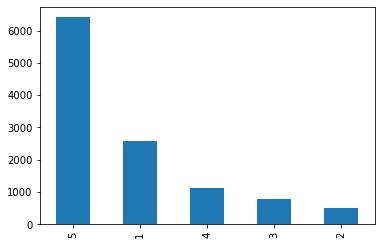

In [3]:
# 목표 변수 분포
review_df['star'].value_counts().plot(kind='bar')

In [4]:
review_df['comment_n']=review_df['comment_n'].apply(lambda x: one_word_list(eval(x)))
review_df['comment_n']

0        [추가, 정보, 등록, 앱, 설정, 충분하다, 굳이, 기기, 화면, 상단, 배치, ...
1        [그냥, 엘지, 제품, 리모컨, 사용, 정신, 건강, 좋다, 앱, 제품, 삭제, 제...
2        [퓨리, 케어, 공기청정기, 단, 짜다, 사용, 중, 어플, 공기청정기, 수치, 표...
3        [에너지, 모니터링, 지난달, 대비, 용량, 전달, 달, 바뀌다, 보기, 달, 시작...
4        [LG, 옙, 서비스, 작동, 기능, 자다, 짜증, 나다, 통신사, 이동, 삼성, ...
                               ...                        
11374                                                 [좋다]
11375                                                 [좋다]
11376                                                  [굿]
11377                                                  [굿]
11378                                                 [좋다]
Name: comment_n, Length: 11379, dtype: object

In [5]:
review_df['comment_n_str']=review_df['comment_n'].apply(lambda x: " ".join(x))
review_df['comment_n_str']

0        추가 정보 등록 앱 설정 충분하다 굳이 기기 화면 상단 배치 끈질기다 개인 정보 요...
1        그냥 엘지 제품 리모컨 사용 정신 건강 좋다 앱 제품 삭제 제품 전원 차단 분 전원...
2        퓨리 케어 공기청정기 단 짜다 사용 중 어플 공기청정기 수치 표시 사라지다 좋다 보...
3            에너지 모니터링 지난달 대비 용량 전달 달 바뀌다 보기 달 시작 더 많이 써다 흘
4        LG 옙 서비스 작동 기능 자다 짜증 나다 통신사 이동 삼성 단말기 교체 별 아깝다...
                               ...                        
11374                                                   좋다
11375                                                   좋다
11376                                                    굿
11377                                                    굿
11378                                                   좋다
Name: comment_n_str, Length: 11379, dtype: object

In [6]:
del_index=review_df[review_df['star']==3].index
review_df.drop(del_index,axis=0,inplace=True)
review_df.shape

(10599, 7)

In [7]:
# 빈 문자열을 가진 레코드도 삭제
review_df['length']=review_df['comment_n_str'].apply(lambda x: len(x))
review_df

date  star  like  \
0      2021년 09월 05일     1  36.0   
1      2021년 09월 06일     1  15.0   
2      2021년 09월 05일     1   8.0   
3      2021년 09월 06일     2   2.0   
4      2021년 09월 07일     1   NaN   
...              ...   ...   ...   
11374  2019년 02월 23일     5   NaN   
11375  2019년 03월 07일     5   NaN   
11376  2019년 03월 03일     5   NaN   
11377  2019년 03월 27일     5   NaN   
11378  2019년 02월 26일     5   NaN   

                                                 comment  \
0      추가정보등록은 앱설정에서 충분히 할수있음에도 굳이 기기화면마다 상단배치하여 끈질기게...   
1      그냥 엘지제품은 리모컨만 사용하는것이 정신 건강에 좋을 듯합니다 앱에서 제품삭제하고...   
2      퓨리케어 공기청정기 1단짜리 사용 중인데 언제부터 어플에서 공기청정기 수치 표시가 ...   
3      에너지모니터링 . 지난달 대비 사용량... 이전달하고 이번달하고 바꼈다. 보기는 했...   
4      LG엡만.서비스오작동기능들이잘안되고짜증나네.통신사이동하고삼성단말기로교체해야것네. 별...   
...                                                  ...   
11374                                            좋아요....   
11375                                             좋아요~~~   
11376                                             굿뜨~~~♡   
11377                                                굿~~   
11378                                           좋아요👍👍👍👍👍   

                                               comment_n  \
0      [추가, 정보, 등록, 앱, 설정, 충분하다, 굳이, 기기, 화면, 상단, 배치, ...   
1      [그냥, 엘지, 제품, 리모컨, 사용, 정신, 건강, 좋다, 앱, 제품, 삭제, 제...   
2      [퓨리, 케어, 공기청정기, 단, 짜다, 사용, 중, 어플, 공기청정기, 수치, 표...   
3      [에너지, 모니터링, 지난달, 대비, 용량, 전달, 달, 바뀌다, 보기, 달, 시작...   
4      [LG, 옙, 서비스, 작동, 기능, 자다, 짜증, 나다, 통신사, 이동, 삼성, ...   
...                                                  ...   
11374                                               [좋다]   
11375                                               [좋다]   
11376                                                [굿]   
11377                                                [굿]   
11378                                               [좋다]   

                                         comment_n_spell  \
0      ['추가 정보 등록은 앱 설정에서 충분히 할 수 있음에도 굳이 기기 화면마다 상단 ...   
1      ['그냥 엘지 제품은 리모컨만 사용하는 것이 정신 건강에 좋을 듯합니다', '앱에서...   
2      ['퓨리 케어 공기청정기 단짜리 사용 중인데 언제부터 어플에서 공기청정기 수치 표시...   
3      ['에너지 모니터링 지난달 대비 사용량 이 전달하고 이번 달하고 바뀌었다', '보기...   
4      ['LG 옙만 서비스 오작동 기능들이 잘 안되고 짜증 나네', '통신사 이동하고 삼...   
...                                                  ...   
11374                                           ['좋아요 ']   
11375                                           ['좋아요 ']   
11376                                              ['굿']   
11377                                             ['굿 ']   
11378                                           ['좋아요 ']   

                                           comment_n_str  length  
0      추가 정보 등록 앱 설정 충분하다 굳이 기기 화면 상단 배치 끈질기다 개인 정보 요...     185  
1      그냥 엘지 제품 리모컨 사용 정신 건강 좋다 앱 제품 삭제 제품 전원 차단 분 전원...     163  
2      퓨리 케어 공기청정기 단 짜다 사용 중 어플 공기청정기 수치 표시 사라지다 좋다 보...      86  
3          에너지 모니터링 지난달 대비 용량 전달 달 바뀌다 보기 달 시작 더 많이 써다 흘      45  
4      LG 옙 서비스 작동 기능 자다 짜증 나다 통신사 이동 삼성 단말기 교체 별 아깝다...      57  
...                                                  ...     ...  
11374                                                 좋다       2  
11375                                                 좋다       2  
11376                                                  굿       1  
11377                                                  굿       1  
11378                                                 좋다       2  

[10599 rows x 8 columns]

In [8]:
del_index=review_df[review_df['length']==0].index
review_df.drop(del_index,axis=0,inplace=True)
review_df.shape

(10560, 8)

In [9]:
review_df['sentiment']=review_df['star'].apply(lambda x: 1 if x>=4 else 0)
review_df

date  star  like  \
0      2021년 09월 05일     1  36.0   
1      2021년 09월 06일     1  15.0   
2      2021년 09월 05일     1   8.0   
3      2021년 09월 06일     2   2.0   
4      2021년 09월 07일     1   NaN   
...              ...   ...   ...   
11374  2019년 02월 23일     5   NaN   
11375  2019년 03월 07일     5   NaN   
11376  2019년 03월 03일     5   NaN   
11377  2019년 03월 27일     5   NaN   
11378  2019년 02월 26일     5   NaN   

                                                 comment  \
0      추가정보등록은 앱설정에서 충분히 할수있음에도 굳이 기기화면마다 상단배치하여 끈질기게...   
1      그냥 엘지제품은 리모컨만 사용하는것이 정신 건강에 좋을 듯합니다 앱에서 제품삭제하고...   
2      퓨리케어 공기청정기 1단짜리 사용 중인데 언제부터 어플에서 공기청정기 수치 표시가 ...   
3      에너지모니터링 . 지난달 대비 사용량... 이전달하고 이번달하고 바꼈다. 보기는 했...   
4      LG엡만.서비스오작동기능들이잘안되고짜증나네.통신사이동하고삼성단말기로교체해야것네. 별...   
...                                                  ...   
11374                                            좋아요....   
11375                                             좋아요~~~   
11376                                             굿뜨~~~♡   
11377                                                굿~~   
11378                                           좋아요👍👍👍👍👍   

                                               comment_n  \
0      [추가, 정보, 등록, 앱, 설정, 충분하다, 굳이, 기기, 화면, 상단, 배치, ...   
1      [그냥, 엘지, 제품, 리모컨, 사용, 정신, 건강, 좋다, 앱, 제품, 삭제, 제...   
2      [퓨리, 케어, 공기청정기, 단, 짜다, 사용, 중, 어플, 공기청정기, 수치, 표...   
3      [에너지, 모니터링, 지난달, 대비, 용량, 전달, 달, 바뀌다, 보기, 달, 시작...   
4      [LG, 옙, 서비스, 작동, 기능, 자다, 짜증, 나다, 통신사, 이동, 삼성, ...   
...                                                  ...   
11374                                               [좋다]   
11375                                               [좋다]   
11376                                                [굿]   
11377                                                [굿]   
11378                                               [좋다]   

                                         comment_n_spell  \
0      ['추가 정보 등록은 앱 설정에서 충분히 할 수 있음에도 굳이 기기 화면마다 상단 ...   
1      ['그냥 엘지 제품은 리모컨만 사용하는 것이 정신 건강에 좋을 듯합니다', '앱에서...   
2      ['퓨리 케어 공기청정기 단짜리 사용 중인데 언제부터 어플에서 공기청정기 수치 표시...   
3      ['에너지 모니터링 지난달 대비 사용량 이 전달하고 이번 달하고 바뀌었다', '보기...   
4      ['LG 옙만 서비스 오작동 기능들이 잘 안되고 짜증 나네', '통신사 이동하고 삼...   
...                                                  ...   
11374                                           ['좋아요 ']   
11375                                           ['좋아요 ']   
11376                                              ['굿']   
11377                                             ['굿 ']   
11378                                           ['좋아요 ']   

                                           comment_n_str  length  sentiment  
0      추가 정보 등록 앱 설정 충분하다 굳이 기기 화면 상단 배치 끈질기다 개인 정보 요...     185          0  
1      그냥 엘지 제품 리모컨 사용 정신 건강 좋다 앱 제품 삭제 제품 전원 차단 분 전원...     163          0  
2      퓨리 케어 공기청정기 단 짜다 사용 중 어플 공기청정기 수치 표시 사라지다 좋다 보...      86          0  
3          에너지 모니터링 지난달 대비 용량 전달 달 바뀌다 보기 달 시작 더 많이 써다 흘      45          0  
4      LG 옙 서비스 작동 기능 자다 짜증 나다 통신사 이동 삼성 단말기 교체 별 아깝다...      57          0  
...                                                  ...     ...        ...  
11374                                                 좋다       2          1  
11375                                                 좋다       2          1  
11376                                                  굿       1          1  
11377                                                  굿       1          1  
11378                                                 좋다       2          1  

[10560 rows x 9 columns]

<AxesSubplot:>

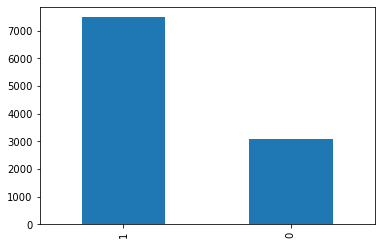

In [10]:
# 목표 변수 분포
review_df['sentiment'].value_counts().plot(kind='bar')

In [11]:
# 훈련 데이터, 테스트 데이터 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(review_df['comment_n_str'], review_df['sentiment'], test_size=0.3, random_state=12)
print('train data set size = {0},  test data set size = {1}'.format(x_train.shape[0],x_test.shape[0]))

train data set size = 7392,  test data set size = 3168


In [12]:
# TF-IDF 벡터화

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=2, ngram_range=(1, 2), strip_accents='unicode', norm='l2')
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.transform(x_test)

In [17]:
X_train = vectorizer.fit(x_train)
X_train = vectorizer.transform(x_train)

In [20]:
X_train.shape

(7392, 8476)

In [24]:
X_test = vectorizer.transform(x_test)

In [21]:
X_test.shape

(3168, 8476)

In [13]:
# 나이브 베이지안 분류 모델 생성과 예측

from sklearn.naive_bayes import MultinomialNB
clf_NB = MultinomialNB().fit(X_train, y_train)
y_predicted_NB = clf_NB.predict(X_test)

In [14]:
# 의사결정나무 분류 모델 생성과 예측

from sklearn import tree
clf_DT = tree.DecisionTreeClassifier().fit(X_train, y_train)
y_predicted_DT = clf_DT.predict(X_test)

In [15]:
#SGD 분류 모델 생성과 예측

from sklearn.linear_model import SGDClassifier
clf_SGD = SGDClassifier(alpha=.0001).fit(X_train, y_train)
y_predicted_SGD = clf_SGD.predict(X_test)

In [16]:
# SVM 모델 생성과 예측

from sklearn.svm import LinearSVC
clf_SVM = LinearSVC().fit(X_train, y_train)
y_predicted_SVM = clf_SVM.predict(X_test)

In [17]:
# Random Forest 분류 모델 생성과 예측

from sklearn.ensemble import RandomForestClassifier
clf_RFA = RandomForestClassifier(n_estimators=10)
clf_RFA.fit(X_train, y_train)
y_predicted_RFA = clf_RFA.predict(X_test)

In [18]:
# 나이브 베이지안 분류 모델 성능 평가

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print (' \n confusion_matrix NB \n ')
cm = confusion_matrix(y_test, y_predicted_NB)
print (cm)
print ('\n Here is the classification report:')
print (classification_report(y_test, y_predicted_NB))

 
 confusion_matrix NB 
 
[[ 769  169]
 [  79 2151]]

 Here is the classification report:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       938
           1       0.93      0.96      0.95      2230

    accuracy                           0.92      3168
   macro avg       0.92      0.89      0.90      3168
weighted avg       0.92      0.92      0.92      3168



In [19]:
# 의사결정나무 분류 모델 성능 평가

print (' \n confusion_matrix DT \n ')
cm = confusion_matrix(y_test, y_predicted_DT)
print (cm)
print ('\n Here is the classification report:')
print (classification_report(y_test, y_predicted_DT))

 
 confusion_matrix DT 
 
[[ 735  203]
 [ 142 2088]]

 Here is the classification report:
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       938
           1       0.91      0.94      0.92      2230

    accuracy                           0.89      3168
   macro avg       0.87      0.86      0.87      3168
weighted avg       0.89      0.89      0.89      3168



In [20]:
# SGD 분류 모델 성능 평가

print (' \n confusion_matrix SGD \n ')
cm = confusion_matrix(y_test, y_predicted_SGD)
print (cm)
print ('\n Here is the classification report:')
print (classification_report(y_test, y_predicted_SGD))

 
 confusion_matrix SGD 
 
[[ 826  112]
 [ 124 2106]]

 Here is the classification report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       938
           1       0.95      0.94      0.95      2230

    accuracy                           0.93      3168
   macro avg       0.91      0.91      0.91      3168
weighted avg       0.93      0.93      0.93      3168



In [21]:
# SVM 분류 모델 성능 평가

print (' \n confusion_matrix SVM\n ')
cm = confusion_matrix(y_test, y_predicted_SVM)
print (cm)
print ('\n Here is the classification report:')
print (classification_report(y_test, y_predicted_SVM))

 
 confusion_matrix SVM
 
[[ 820  118]
 [ 113 2117]]

 Here is the classification report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       938
           1       0.95      0.95      0.95      2230

    accuracy                           0.93      3168
   macro avg       0.91      0.91      0.91      3168
weighted avg       0.93      0.93      0.93      3168



In [22]:
#Random Forest 분류 모델 성능 평가

print (' \n confusion_matrix RFA \n ')
cm = confusion_matrix(y_test, y_predicted_RFA)
print (cm)
print ('\n Here is the classification report:')
print (classification_report(y_test, y_predicted_RFA))


 
 confusion_matrix RFA 
 
[[ 781  157]
 [ 157 2073]]

 Here is the classification report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       938
           1       0.93      0.93      0.93      2230

    accuracy                           0.90      3168
   macro avg       0.88      0.88      0.88      3168
weighted avg       0.90      0.90      0.90      3168

